In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sktime.forecasting.arch import ARCH
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import ARIMA, AutoARIMA
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Датасет взят с https://datahub.io/core/gold-prices

Date - месяц

Price - цена золота в долларах США за тройскую унцию

In [2]:
df = pd.read_csv('/content/flat-ui_data-Fri_May_30_2025_3.csv')
df

,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93
...,...,...
2302,2024-11,2651.13
2303,2024-12,2648.01
2304,2025-01,2709.69
2305,2025-02,2894.73


In [3]:
df['Date']

,Date
0,1833-01
1,1833-02
2,1833-03
3,1833-04
4,1833-05
...,...
2302,2024-11
2303,2024-12
2304,2025-01
2305,2025-02


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Date']

,Date
0,1833-01-01
1,1833-02-01
2,1833-03-01
3,1833-04-01
4,1833-05-01
...,...
2302,2024-11-01
2303,2024-12-01
2304,2025-01-01
2305,2025-02-01


In [6]:
fdf = df[(df['Date'] >= '2000-01-01')]
fdf

,Date,Price
2004,2000-01-01,284.32
2005,2000-02-01,299.86
2006,2000-03-01,286.39
2007,2000-04-01,279.69
2008,2000-05-01,275.19
...,...,...
2302,2024-11-01,2651.13
2303,2024-12-01,2648.01
2304,2025-01-01,2709.69
2305,2025-02-01,2894.73


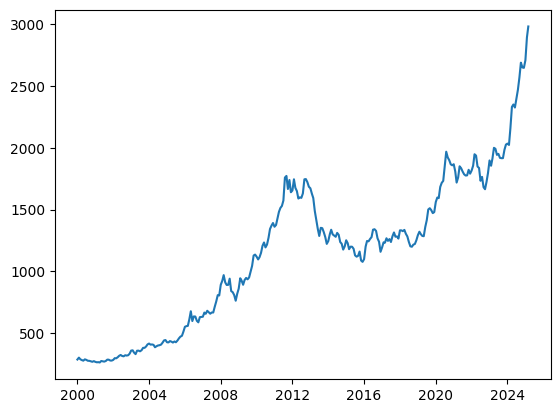

In [7]:
plt.plot(fdf['Date'],fdf['Price'])
plt.show()

In [8]:
y = fdf.set_index('Date')
y.index = y.index.to_period('M').to_timestamp('M')
y = y.asfreq('M')
y

,Price
Date,
2000-01-31,284.32
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19
...,...
2024-11-30,2651.13
2024-12-31,2648.01
2025-01-31,2709.69


In [9]:
forecaster= AutoARIMA(information_criterion='aic', test='kpss', seasonal=True)
forecaster.fit(y)
forecaster.get_fitted_params()

{'intercept': 8.978724849527742,
 'ma.L1': 0.27126347311411125,
 'sigma2': 1906.0071199081754,
 'order': (0, 1, 1),
 'seasonal_order': (0, 0, 0, 0),
 'aic': 3144.046640927901,
 'aicc': 3144.1271778406526,
 'bic': 3155.1779219800255,
 'hqic': 3148.5004037579038}

In [10]:
forecaster = ARIMA(order=(0,1,1), trend='ct')
forecaster.fit(y)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  303
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1567.490
Date:                Mon, 16 Jun 2025   AIC                           3142.981
Time:                        19:06:23   BIC                           3157.822
Sample:                    01-31-2000   HQIC                          3148.919
                         - 03-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4039      9.336     -0.043      0.965     -18.703      17.895
drift          0.0624      0.045      1.389      0.165      -0.026       0.150
ma.L1          0.2632      0.048      5.521      0.000       0.170       0.357
sigma2      1886.6104    119.532     15.783      0.000    1652.332    2120.889
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                27.66
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               5.39   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
fh = ForecastingHorizon(np.arange(1,34), freq = 'M')
y_pred_arima = forecaster.fit_predict(y=y, fh=fh)
y_pred_arima.round(2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:861: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  absolute = pd.DatetimeIndex(absolute, freq=fh.freq)
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:861: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use '

,Price
2025-04-30,3009.44
2025-05-31,3027.99
2025-06-30,3046.61
2025-07-31,3065.28
2025-08-31,3084.02
2025-09-30,3102.83
2025-10-31,3121.69
2025-11-30,3140.62
2025-12-31,3159.61
2026-01-31,3178.66


In [76]:
!pip uninstall arch -y
!pip install arch

Found existing installation: arch 7.2.0
Uninstalling arch-7.2.0:
  Successfully uninstalled arch-7.2.0
  Using cached arch-7.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached arch-7.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (985 kB)


In [12]:
volatility = ARCH(mean='AR', lags=1, vol='GARCH', p=1, q=1, power=2)
volatility.fit(y)
volatility.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   None   R-squared:                       0.995
Mean Model:                        AR   Adj. R-squared:                  0.995
Vol Model:                      GARCH   Log-Likelihood:               -1508.31
Distribution:                  Normal   AIC:                           3026.62
Method:            Maximum Likelihood   BIC:                           3045.18
                                        No. Observations:                  302
Date:                Mon, Jun 16 2025   Df Residuals:                      300
Time:                        19:06:28   Df Model:                            2
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0.1110      1.957  5.673e-02      0.955 [ -3.725,  3.947]
None[1]        1.0062  4.797e-03    209.754      0.000 [  0.997,  1.016]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.8755      5.264      0.926      0.354    [ -5.441, 15.192]
alpha[1]       0.0963  5.436e-02      1.772  7.640e-02 [-1.022e-02,  0.203]
beta[1]        0.9037  7.272e-02     12.426  1.883e-35    [  0.761,  1.046]
===========================================================================

Covariance estimator: robust
"""

In [13]:
fh = ForecastingHorizon(np.arange(1,34), freq ='M')
y_pred_garch = volatility.fit_predict(y=y, fh=fh)
y_pred_garch.round(2)

/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:861: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  absolute = pd.DatetimeIndex(absolute, freq=fh.freq)
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:861: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  absolute = pd.DatetimeIndex(absolute, freq=fh.freq)


,Price
2025-04-30,3001.84
2025-05-31,3020.55
2025-06-30,3039.37
2025-07-31,3058.31
2025-08-31,3077.37
2025-09-30,3096.54
2025-10-31,3115.84
2025-11-30,3135.25
2025-12-31,3154.78
2026-01-31,3174.44


In [14]:
pred_ints = forecaster.predict_interval(fh=fh, coverage=0.95)
print(pred_ints.columns.tolist())

[('Price', 0.95, 'lower'), ('Price', 0.95, 'upper')]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:861: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
/usr/local/lib/python3.11/dist-packages/sktime/forecasting/base/_fh.py:875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  absolute = pd.DatetimeIndex(absolute, freq=fh.freq)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1

In [15]:
baseline = y_pred_arima
optimistic = pred_ints[('Price', 0.95, 'upper')]
pessimistic = pred_ints[('Price', 0.95, 'lower')]

In [16]:
optimistic

,Price
,0.95
,upper
2025-04-30,3094.568065
2025-05-31,3165.143501
2025-06-30,3220.889279
2025-07-31,3270.072473
2025-08-31,3315.329264
2025-09-30,3357.906641
2025-10-31,3398.511942
2025-11-30,3437.592304


In [17]:
pessimistic

,Price
,0.95
,lower
2025-04-30,2924.305488
2025-05-31,2890.836192
2025-06-30,2872.321272
2025-07-31,2860.493652
2025-08-31,2852.717152
2025-09-30,2847.744784
2025-10-31,2844.869209
2025-11-30,2843.643290


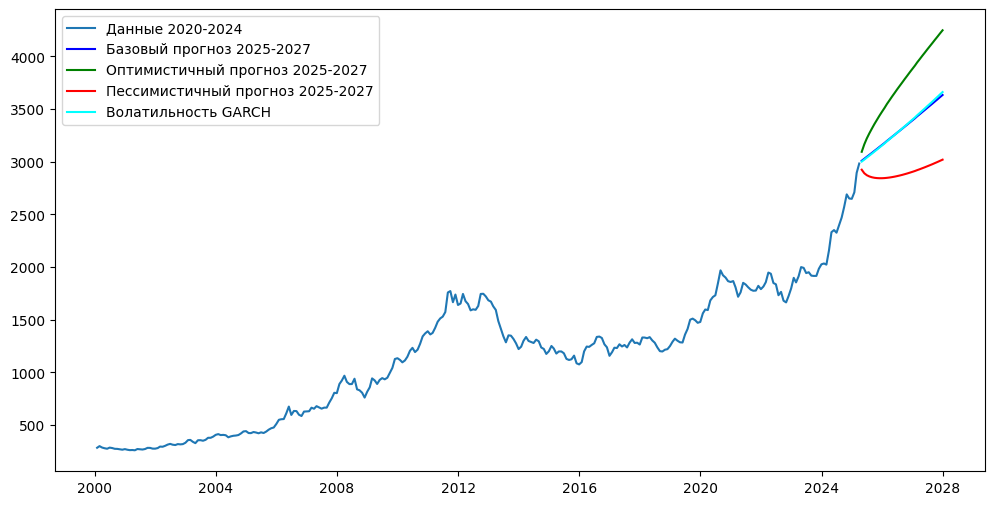

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Данные 2020-2024')
plt.plot(y_pred_arima.index, baseline, label='Базовый прогноз 2025-2027', color='blue')
plt.plot(y_pred_arima.index, optimistic, label='Оптимистичный прогноз 2025-2027', color='green')
plt.plot(y_pred_arima.index, pessimistic, label='Пессимистичный прогноз 2025-2027', color='red')
plt.plot(y_pred_garch.index, y_pred_garch, label='Волатильность GARCH', color='cyan')
plt.legend();

декабрь 2027 по сравнению с декабрем 2024

базовый - рост на 37%
оптимистичный - рост на 60%
пессимистичный - рост на 14%